In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = {"PCC": ["FGWWW",
                "HHWWW",
                "HWGWW",
                "HWWTW",
                "WGWWW",
                "WWWWY",
                "YGAWW",
                "YGWWW",
                "YNAWW"
],
        "dGf" : ["-9.65 ",
                "-10.43",
                "-9.06 ",
                "-9.21 ",
                "-9.56 ",
                "-10.30",
                "-8.41 ",
                "-11.14",
                "-10.09"
        ],
        "errf": ["0.35",
                "0.32",
                "0.35",
                "0.37",
                "0.47",
                "0.46",
                "0.17",
                "0.53",
                "0.26"
        ], 
        "dGa": ["-6.80",
                "-6.40",
                "-6.53",
                "-6.53",
                "-6.18",
                "-6.61",
                "-5.83",
                "-6.43",
                "-6.55"
        ],
        "erra": [
                "0.32",
                "0.27",
                "0.52",
                "0.20",
                "0.19",
                "0.16",
                "0.49",
                "0.16",
                "0.25"
        ]
}
data = pd.DataFrame(data)
data.dGf = data.dGf.astype(float)
data.errf = data.errf.astype(float)
data.dGa = data.dGa.astype(float)
data.erra = data.erra.astype(float)
data["sen"] = -data.dGf.copy()
data["sen_e"] = data.errf.copy()
data["spe"] = data.dGa - data.dGf
data["spe_e"] = np.sqrt(data.errf**2 + data.erra**2)

In [8]:
data

,PCC,dGf,errf,dGa,erra,sen,sen_e,spe,spe_e
0,FGWWW,-9.65,0.35,-6.80,0.32,9.65,0.35,2.85,0.474236
1,HHWWW,-10.43,0.32,-6.40,0.27,10.43,0.32,4.03,0.418688
2,HWGWW,-9.06,0.35,-6.53,0.52,9.06,0.35,2.53,0.626817
3,HWWTW,-9.21,0.37,-6.53,0.20,9.21,0.37,2.68,0.420595
4,WGWWW,-9.56,0.47,-6.18,0.19,9.56,0.47,3.38,0.506952
5,WWWWY,-10.30,0.46,-6.61,0.16,10.30,0.46,3.69,0.487032
6,YGAWW,-8.41,0.17,-5.83,0.49,8.41,0.17,2.58,0.518652
7,YGWWW,-11.14,0.53,-6.43,0.16,11.14,0.53,4.71,0.553624
8,YNAWW,-10.09,0.26,-6.55,0.25,10.09,0.26,3.54,0.360694


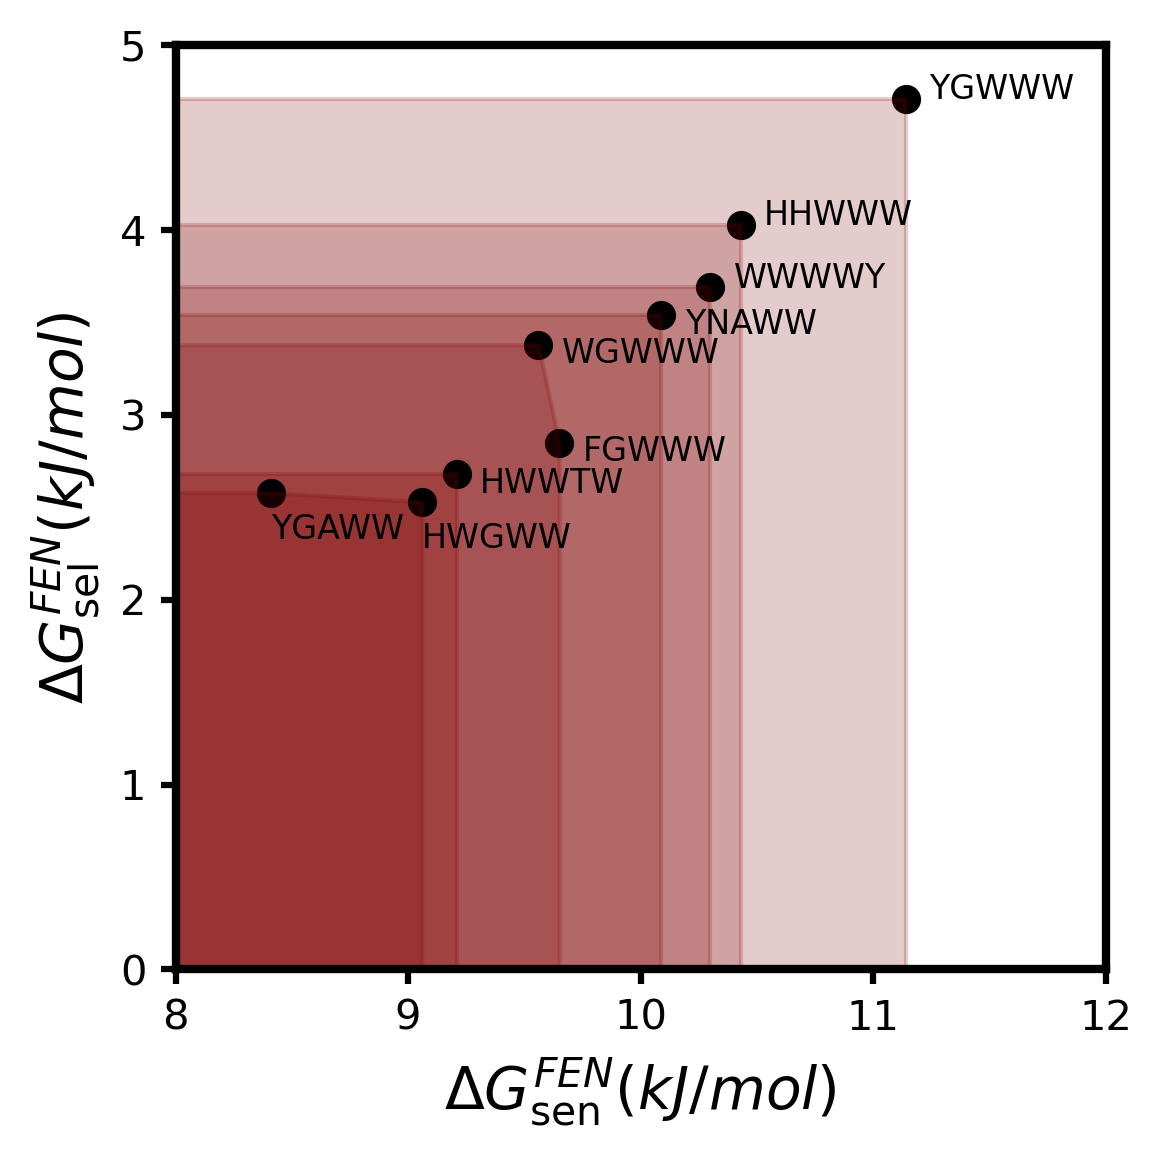

In [9]:
pareto_names = {1: ["YGWWW",
                    ],
                2: ["HHWWW",
                ],
                3: ["WWWWY",
                    ],
                4: ["YNAWW"
                ],
                5:["WGWWW",
                   "FGWWW"
                ],
                6: ["HWWTW"
                    ], 
                7: ["HWGWW",
                    "YGAWW"
                    ]
                }

pareto_points = {}
for r, pccs in pareto_names.items():
    pareto_points[r] = []
    for pcc in pccs:
        pcc_row = data[data.PCC == pcc]
        pareto_points[r].append([pcc_row.sen.item(), pcc_row.spe.item()])
    pareto_points[r] = np.asarray(pareto_points[r])

fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=300)
for i, pfront in pareto_points.items():
    x = pfront[:, 0]
    y = pfront[:, 1]
    ax.scatter(x, y, color='k')
    x_args = x.argsort()
    x_fill = [8] + list(x[x_args]) + [x[x_args][-1]]
    y_fill = [y[x_args][0]] + list(y[x_args]) + [2]
    ax.fill_between(x_fill, y_fill, color='#800000', alpha=0.2)

    if i in [1, 2, 3]:
        for j in range(len(x)):
            txt = pareto_names[i][j]
            ax.annotate(txt, (x[j]+0.1, y[j]), fontsize=8, rotation=0)
    elif i==7:
        for j in range(len(x)):
            txt = pareto_names[i][j]
            ax.annotate(txt, (x[j]+0.0, y[j]-0.25), fontsize=8, rotation=0)
    else:
        for j in range(len(x)):
            txt = pareto_names[i][j]
            ax.annotate(txt, (x[j]+0.1, y[j]-0.1), fontsize=8, rotation=0)

ax.set_xlim(8, 12)
ax.set_ylim(0, 5)
ax.set_xlabel(r"$\Delta G^{FEN}_{\text{sen}} (kJ/mol)$", fontsize=14)
ax.set_ylabel(r"$\Delta G^{FEN}_{\text{sel}} (kJ/mol)$", fontsize=14)
ax.xaxis.set_tick_params(width=1.5)
ax.yaxis.set_tick_params(width=1.5)
for side in ['top', 'bottom', 'left', 'right']:
    ax.spines[side].set(lw=2)
plt.show()

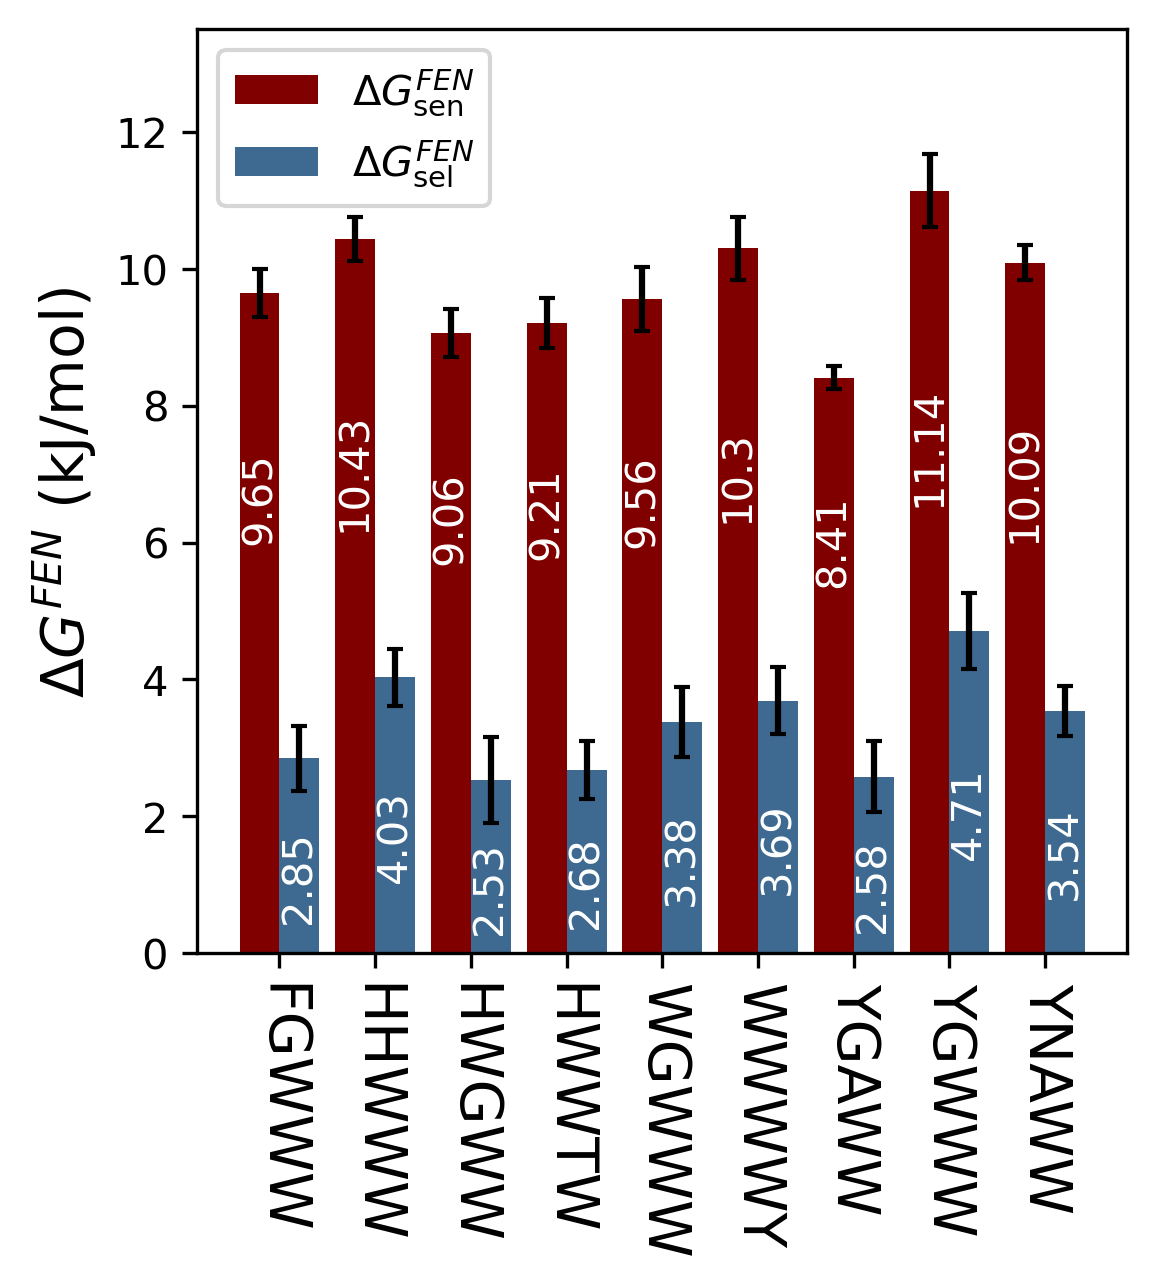

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4), dpi=300)
xs = np.arange(3*len(data), step=3)
y1s = data.sen.to_numpy()
y1es = data.sen_e.to_numpy()
y2s = data.spe.to_numpy()
y2es = data.spe_e.to_numpy()

rects = ax.bar(xs-0.625, y1s, 1.25, label=r"$\Delta G^{FEN}_{\text{sen}}$", color="#800000")
ax.bar_label(rects, padding=30, rotation=90, label_type="center", color='w')
ax.errorbar(xs-0.625, y1s, y1es, fmt='none', color='k', capsize=2)
rects = ax.bar(xs+0.625, y2s, 1.25, label=r"$\Delta G^{FEN}_{\text{sel}}$", color="#3E6990")
ax.errorbar(xs+0.625, y2s, y2es, fmt='none', color='k', capsize=2)
ax.bar_label(rects, padding=-5, rotation=90, label_type="center", color='w')


ax.set_ylim(0, 13.5)
ax.set_ylabel(r"$\Delta G^{FEN}$ (kJ/mol)", fontsize=14)
ax.set_xticks(xs, data.PCC.to_list(), rotation=-90, fontsize=14)
ax.legend(loc="upper left", ncols=1)

In [47]:
x

array([8.41])